In [1]:
import pandas as pd
import numpy as np

# Optimized Route of Delivery

A delivery person of Amazon in NYC received 12 points where they need to deliver a package. This 12 points are houses located in Manhattan, New York. To save money in Gasoline (tour the less kilometers possible) and optimized the time it takes for delivering in Manhattan, Amazon needs to create a route that connects all the houses that are being delivered, and send this route to the delivery person. 

In order to do this, we are going to create a network that connects 13 points (12 houses and the Amazon's Warehouse), that starts in the Warehouse and finishes in the warehouse. We can represent the points (nodes) of the graph as following:

$$x_{ij}=\left\{\begin{array}{ll}
1 & \textrm{if delivery person travel from house $i$ to house $j$}\\
0 & \textrm{otherwise (the houses are not connected)}
\end{array}\right.$$


In order to optimize the time and distance the delivery person travels, we need to write the following objective function:

$$\min_{x_{ij}} \sum\nolimits_{i\neq j} Distance_{ij} x_{ij} + Time_{ij}x_{ij}$$

where:

$Distance_{ij}$ represents the car distance in kilometers that it takes the delivery person to go from point $i$ to point $j$

$Time_{ij}$ represents the time in minutes that it takes the delivery person to go from point $i$ to point $j$


The constraints of the problem are related to the construction of the network:

To ensure that each point is entered only once:

$$\sum_{i = 0}^{n-1} x_{ij} = 1$$ $$\textrm{for all $j = 0,...,n-1$}$$

To ensure that each point is exited only once:

$$\sum\limits_{j = 0}^{n-1} = 1$$ $$\textrm{for all $i = 0,...,n-1$}$$

And for elimintating subtours and cycles, and ensure all the points are correcly connected we use the Miller-Tucker-Zemlin formulation, which uses an additional variable:

$$ u_i \quad \textrm{represents the order for each point $i$}$$

$u_i$: gets a value for each node. So if the value of $u_j$ is higher than $u_i$, then the delivery person first goes from node $i$ to node $j$. So each time a new node have been visite, the value of $u_i$ is increased. 

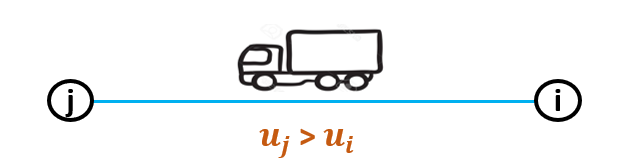

We can write these rule in the following way:

To ensure the delivery starts their journey in the warehouse (point 0):

$$u_0 = 0$$
$$1 \leq u_{i} \leq n-1 \quad \forall i = 1,...,n-1$$


To ensure that there are no subtours, and all the points are connected one after the other:

$$u_{i}-u_{j}+1 \leq (n-1)(1-x_{ij})\quad 1 \leq i\neq j \leq n-1$$


We have the following addresses where the delivery person needs to go to deliver a package. 

- **Warehouse**: 1100 Bryant Park, NewYork, NY 10036
- **House 1**: 27 HENRY STREET
- **House 2**:50 WEST STREET
- **House 3**:160 EAST 65TH STREET, 31E
- **House 4**:200 EAST 62ND   STREET
- **House 5**:309 EAST 75TH   STREET
- **House 6**:212 WEST 18TH   STREET
- **House 7**:685 WEST END AVENUE, 12D
- **House 8**:188 EAST 64TH STREET
- **House 9**:71 WARREN STREET
- **House 10**:252 7 AVENUE
- **House 11**:30 LITTLE WEST STREET
- **House 12**:1160 THIRD AVENUE, 3J

We can visualize them in google maps:

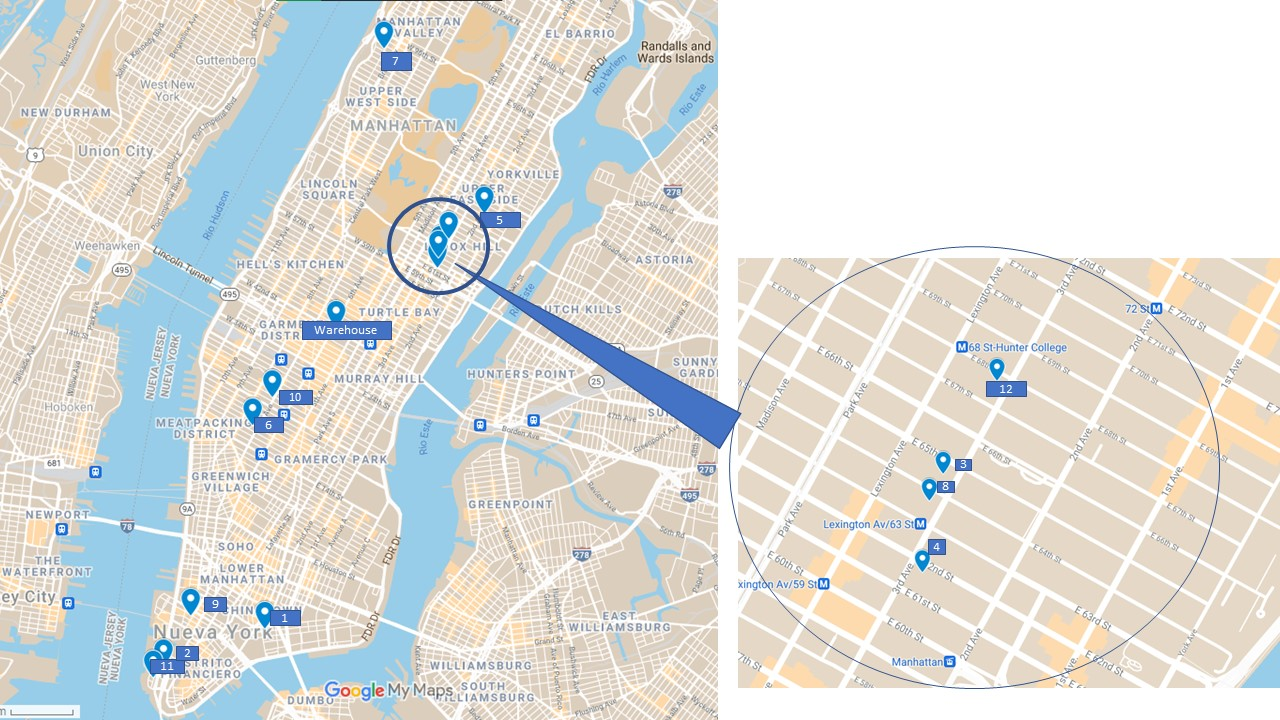

And with Google Maps we obtained the driving distance and time it takes a car to travel from one point to another. For the travel time we took into account the traffic in Manhattan generated on a Monday morning, and took the mean time it takes a car to travel from one point to another, to ensure the traffic factor is considerated when creating the graph. We stored this information in the matrix `Distance` and the matrix `Time`

In [2]:
# Distance in Kilometers
Distance = np.array([
[0,6.2,7.4,2.7,2.5,4.2,2.9,5.1,2.6,5.7,1.8,7.3,3.0],
[5.7,0,2.9,10.1,7.4,10.2,4.4,12.3,7.3,1.7,4.6,3.0,7.3],
[6.3,3.1,0,9.1,11.6,12.4,4.5,11.1,9.5,1.3,5.3,1.3,12.1],
[3.0,7.0,11.2,0,0.8,1.5,5.8,4.6,0.55,8.5,4.6,11.6,0.25],
[2.8,6.7,11.1,0.7,0,1.7,5.5,4.8,0.8,8.3,4.4,11.5,0.5],
[3.9,10.1,11.6,1.4,1.45,0,6.7,4.0,1.35,12.2,5.5,12.3,1.0],
[2.3,3.9,5.2,5.0,4.8,6.5,0,8.1,5.0,3.8,1.5,5.0,5.2],
[6.5,12.0,12.5,4.5,5.2,4.5,7.7,0,4.5,11.1,8.3,12.3,4.7],
[3.1,9.6,11.1,0.55,0.75,1.5,5.8,4.7,0,10.0,4.7,11.5,0.35],
[5.2,1.8,1.7,8.0,7.7,12.9,3.7,10.7,7.9,0,4.1,1.9,8.2],
[1.8,4.4,5.6,4.7,4.4,6.1,1.1,7.8,4.6,3.9,0,5.5,4.9],
[6.8,3.5,0.8,10.4,11.2,12.0,4.9,11.5,10.5,1.7,5.7,0,11.7],
[3.2,9.7,11.4,0.7,1.1,1.2,6.0,4.3,0.8,8.8,4.9,11.8,0]])

In [3]:
# Time in minutes
Time = np.array([
[0,30,35,17,16,23.5,16,26,17,30,11,33,18],
[31,0,19,28,21,28,24,38,25.5,14,24.5,13,28],
[31,18,0,42,25.5,26,16,30,41,5.5,24,8,25.5],
[20,38,14,0,7,8,34,21,4.5,43,27,21,2],
[19,37.5,20,5,0,9,31,24,5.5,43.5,27,22,2],
[27,31.5,31,8.5,9.5,0,37.5,18,9,37,30,35,5.5],
[12,23,23,27,26,30,0,24,29.5,17.5,7,23.5,30],
[34,39,38.5,24,29,25,26,0,23.5,31.5,26,34,27],
[22.5,20,19,4.5,6.5,8.5,34,23.5,0,39,27,20,2],
[24,12,11,37,40,47,21,30,35,0,19,11,30],
[10,23,23,27,26,33,7,24,27,19,0,22,30],
[30.5,12,4,45,22,26,19,28,27,8.5,24,0,25],
[22.5,31.5,21,5,8.5,7,34,19,5.5,25.5,27,23,0]
])

We program the problem stated above in Pyomo to obtained the optimized graph-network:

In [4]:
from pyomo.environ import *
model = ConcreteModel()

n = 13 # number of points

model.I = RangeSet(0,n-1)
model.J = RangeSet(0,n-1)


# point x_ij is directed from i to j
model.x = Var(model.I, model.J, domain = Binary)

# Objective function to minimize the travel time and distance. 
def obj_fun(model):
    return sum(sum(Distance[i,j]*model.x[i,j] + Time[i,j]*model.x[i,j]for i in model.I if(i!=j)) for j in model.J) 

model.Obj = Objective(rule=obj_fun, sense=minimize)

# ensure the vehicle enters only once per point
def in_constraint(model, i): 
    return sum(model.x[i,j] for j in model.J if (j!=i) ) == 1
model.in_Constraint = Constraint(model.I, rule=in_constraint)

# ensures the vehicle exits only once per point
def out_constraint(model, j): 
    return sum(model.x[i,j] for i in model.I if (j!=i)) == 1
model.out_Constraint = Constraint(model.J, rule=out_constraint)


# constraints to avoid cycles:

model.u = Var(model.I, domain=NonNegativeReals)

def u1_initialize(model,i): 
        if i==0:
            return model.u[i] == 1
        else:
            return model.u[i] >= 2
model.u1_Constraint = Constraint(model.I,rule=u1_initialize)

def u2_connect(model,i): 
    return model.u[i] <= n
model.u2_Constraint = Constraint(model.I,rule=u2_connect)

def subtour_elimination(model, i, j): 
        if (i!=0 and j!=0 and i!=j):
            return model.u[i] - model.u[j] + 1 <= (n - 1)*(1 - model.x[i,j])
        else:
            return Constraint.Skip
model.cycle_Constraint = Constraint(model.I, model.J, rule=subtour_elimination)

In [5]:
# Define the solver
opt = SolverFactory('glpk')

# Solve
results = opt.solve(model)


In [6]:
total_km= 0
total_min = 0
connected_to = []
nodes = []
for i in range(0,n):
    for j in range(0,n):
        if model.x[i,j]() == 1:
            total_km += Distance[i,j]
            total_min += Time[i,j]
            nodes.append(i)
            connected_to.append(j)
            
print("Total Distance: " + str(total_km) + " km")
print("Total Time: " + str(total_min) + " minutes")


Total Distance: 33.800000000000004 km
Total Time: 146.0 minutes


In [7]:
nodes_ordered = np.array([int(model.u[i].value) for i in model.I]) - 1
nodes_ordered = list(nodes_ordered)

In [8]:
def reorder(arr,index, n):
 
    temp = [0] * n;
 
    # arr[i] should be
        # present at index[i] index
    for i in range(0,n):
        temp[index[i]] = arr[i]
 
    # Copy temp[] to arr[]
    for i in range(0,n):
        arr[i] = temp[i]
        index[i] = i
    
    return temp

nodes_ord = reorder(nodes, nodes_ordered, len(nodes))
nodes_ord
# print(nodes_ord)

print("Directions for the delivery: ")
print( str(nodes_ord[0]), end ="")
for i in nodes_ord:
    print( "--> " + str(connected_to[i]), end = "")


Directions for the delivery: 
0--> 4--> 3--> 8--> 12--> 5--> 7--> 9--> 1--> 11--> 2--> 6--> 10--> 0

With the optimized route obtained from Pyomo, it takes the delivery person **146 minutes (2 hours and 23 minutes)** and **33.8 kilometers** for the delivery man to deliver all the packages in the given houses and return back to the warehouse. And the route they followed can be plotted in google maps. For a better visualization and interaction, this <a href ="https://www.google.com/maps/d/edit?mid=1Va2m7BLlFs9vS-Ih-EmR6y0GK2o0DTVV&usp=sharing" target="_blank">link"</a> can be used:

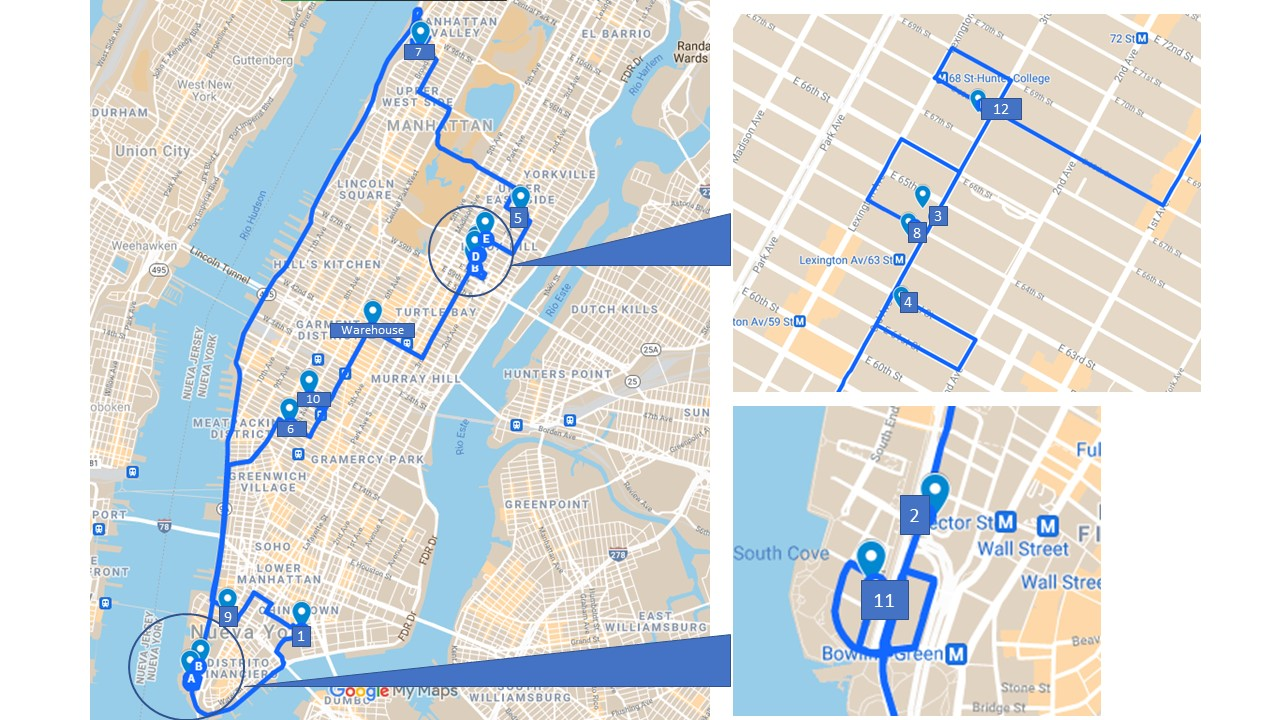
